# Analyzing  Speedtest Results

In [1]:
import os
import re
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import custom_module as M

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# gather all dicts into a master dict (of dicts)
master_dict = M.gather_dicts()

In [3]:
# create long pandas df
df_wide = pd.DataFrame.from_dict(master_dict)
df_long = df_wide.T
df_long.index = range(len(df_long))
df_long

,test,day,location,computer,access_point,data
0,1,2022-09-04,upper_west,HP ProBook 450 G5,None,"{'time': ['16:38:34', '16:39:47', '16:43:13', ..."
1,2,2022-09-04,upper_west,HP ProBook 450 G5,None,"{'time': ['18:27:12', '18:27:46', '18:29:34', ..."
2,3,2022-09-06,living_room,15Z95P-P.AAB8U1,None,"{'time': ['12:37:28', '12:40:30', '12:41:04', ..."
3,4,2022-09-06,upper_east,15Z95P-P.AAB8U1,None,"{'time': ['12:51:39', '12:55:18', '12:57:19', ..."
4,5,2022-09-07,lower_west,HP ProBook 450 G5,None,"{'time': ['11:19:49', '11:25:05', '11:28:21', ..."
5,6,2022-09-07,living_room,HP ProBook 450 G5,None,"{'time': ['17:39:06', '17:42:51', '17:45:56', ..."
6,7,2022-09-07,upper_east,15Z95P-P.AAB8U1,None,"{'time': ['18:42:10', '18:46:21', '18:51:38', ..."
7,8,2022-09-09,upper_east,15Z95P-P.AAB8U1,None,"{'time': ['17:18:31', '17:20:15', '17:23:21', ..."
8,9,2022-09-09,upper_east,HP ProBook 450 G5,None,"{'time': ['17:18:41', '17:20:52', '17:26:06', ..."
9,10,2022-09-10,living_room,HP ProBook 450 G5,None,"{'time': ['21:18:47', '21:21:33', '21:22:47', ..."


In [4]:
# The `data` col is a dict of time of day, jitter and latency in secs, and download and upload speeds in Mbps
df_long.loc[0,'data']

{'time': ['16:38:34', '16:39:47', '16:43:13', '16:45:29', '16:47:07'],
 'jitter': [1.044, 1.189, 1.904, 0.514, 2.18],
 'latency': [14.797, 13.487, 12.067, 13.509, 13.444],
 'download': [157.935456, 121.17854, 121.29388, 152.303892, 170.274728],
 'upload': [10.703478, 7.654459, 9.4381, 9.449713, 8.825212]}

The custom help function `plot_speeds` shows upload and download speeds (and an average download speed) for a single test suite (or test run) that includes typically 5 iterations or speed tests.

This is too zoomed in for insights given how our speeds vary per day, time of day, and computer used:

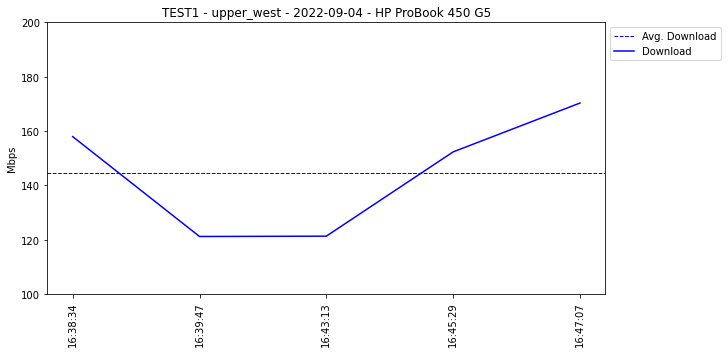

In [5]:
M.plot_download(df=df_wide, test='test1')

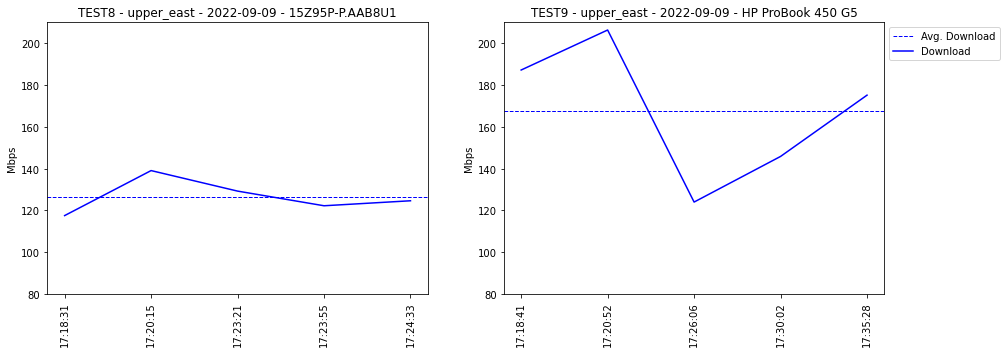

In [6]:
M.compare_downloads(df=df_wide, tests=['test8', 'test9'], ymin=80, ymax=210)

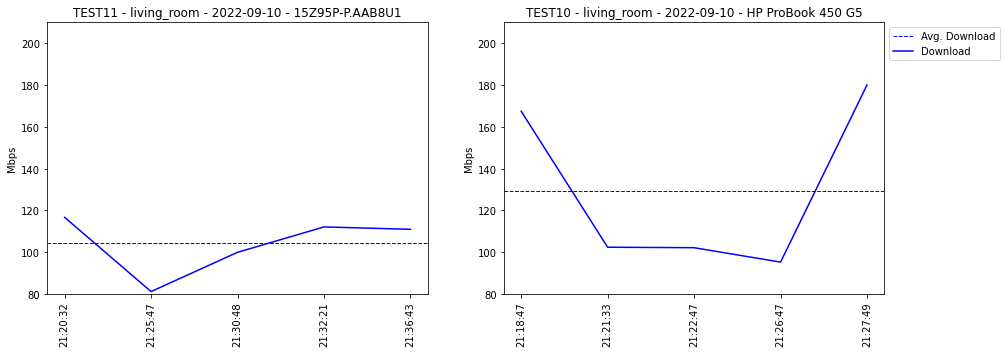

In [7]:
M.compare_downloads(df=df_wide, tests=['test11', 'test10'], ymin=80, ymax=210)

## Dates

Focusing on download speeds since that's most of our use case, I look at variance in download times given different dates:

In [8]:
date_df = M.prep_boxplot(df_wide, "day")
date_df.iloc[:,:10]

,2022-09-04,2022-09-04,2022-09-06,2022-09-06,2022-09-07,2022-09-07,2022-09-07,2022-09-09,2022-09-09,2022-09-10
0,157.935456,112.440335,119.241076,113.436254,158.907815,129.378666,124.565696,117.526268,187.156376,167.445896
1,121.178540,108.056060,94.396195,122.929118,115.414416,174.253227,129.017222,139.053276,206.287734,102.399995
2,121.293880,103.397200,109.327660,112.037480,173.922456,149.904256,125.447536,129.241544,123.996295,102.165275
3,152.303892,91.695235,77.585152,95.961420,100.212940,115.068396,157.880787,122.228234,145.824000,95.283936
4,170.274728,180.695053,107.714420,110.211304,125.396480,106.447096,119.062956,124.613870,175.131380,180.010595


Since it's hard to get a sense by looking at numbers, we can plot a __heatmap__:

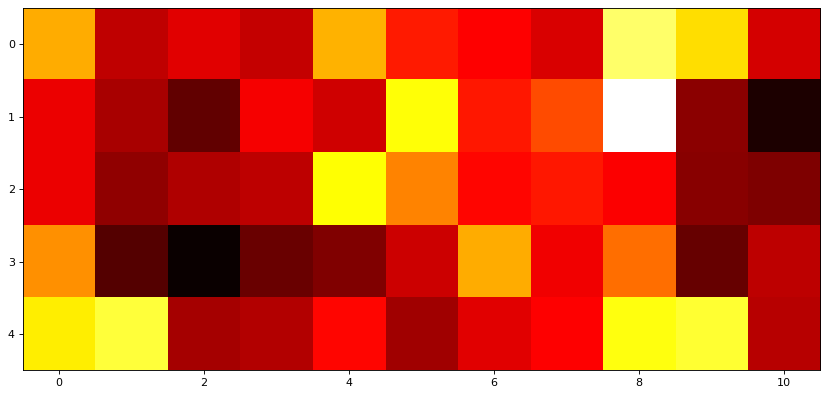

In [9]:
fig=plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(date_df, cmap='hot', interpolation='nearest')
plt.show()

There's a lot of variation but we can see how some tests result in lower speeds and others in higher speeds by looking at the vertical bands.

Another way to visualize this would be __boxplots__ to show the variation `within` and `in-between` tests:

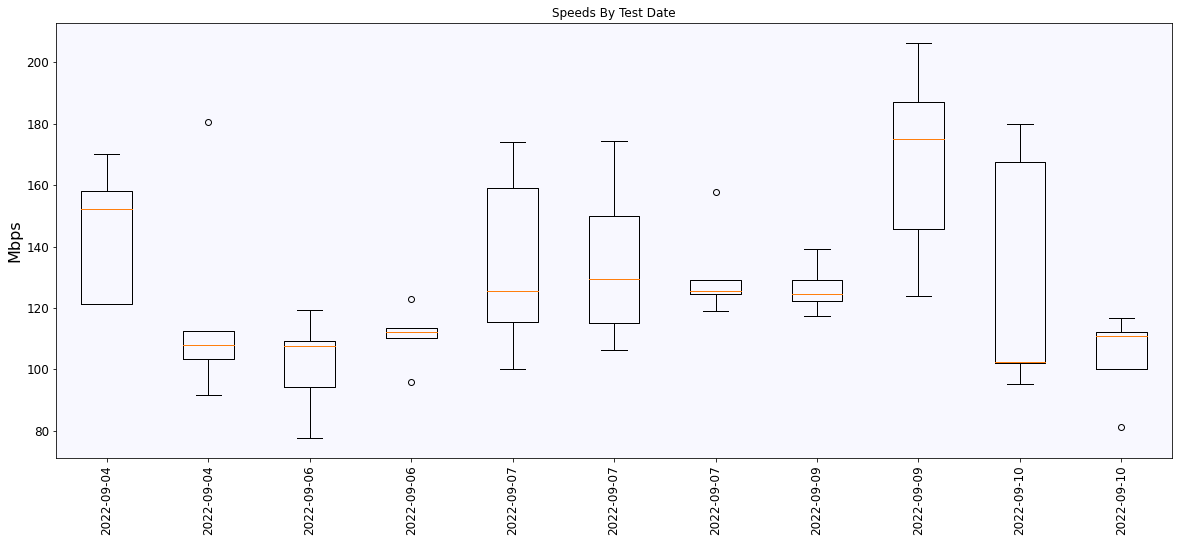

In [10]:
# misses aggregating by Date...
M.plot_boxplots(date_df, "Test Date")

## Laptop location

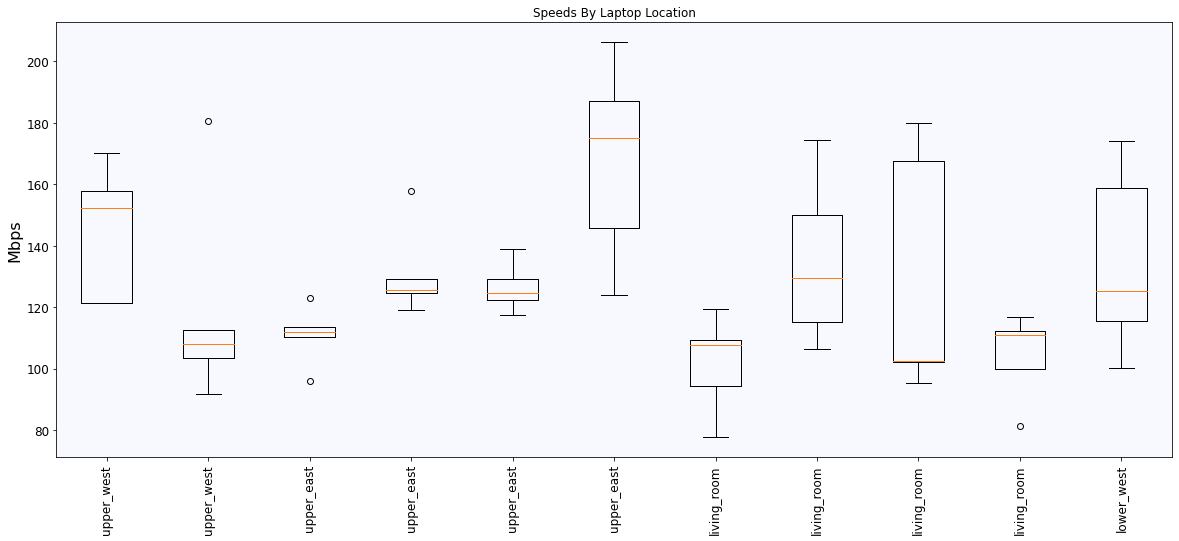

In [23]:
# also misses agg but can reorder using labels
loc_df = M.prep_boxplot(df_wide, 'location')
M.plot_boxplots(loc_df[['upper_west', 'upper_east', 'living_room','lower_west']], "Laptop Location")


## Laptop

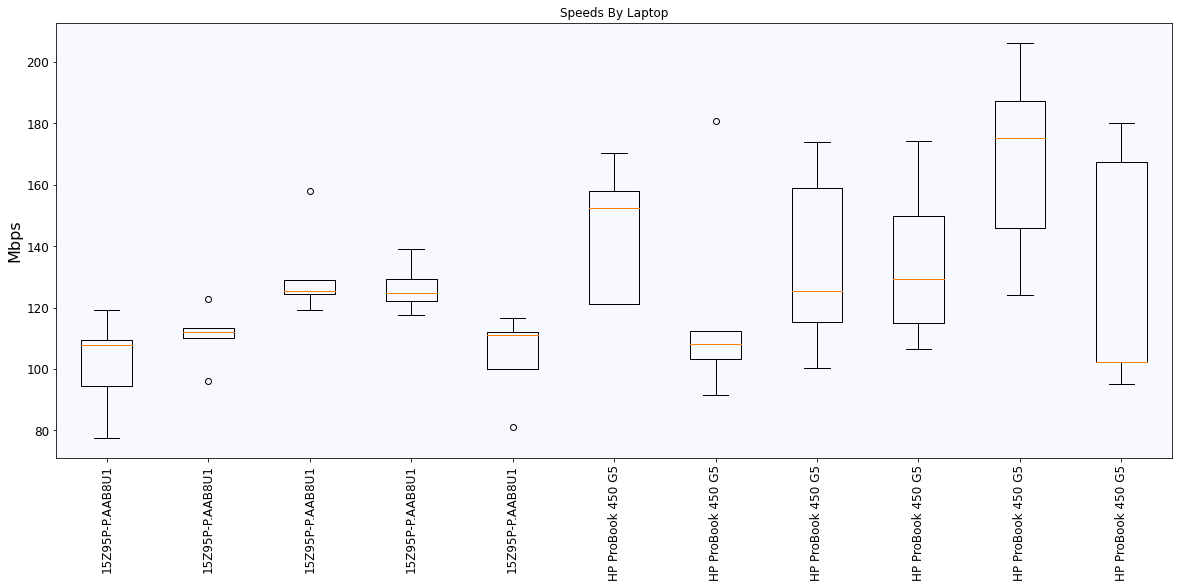

In [22]:
# also misses agg but can reorder...
comp_df = M.prep_boxplot(df_wide, "computer")
M.plot_boxplots(comp_df[['15Z95P-P.AAB8U1', 'HP ProBook 450 G5']], "Laptop")

---